In [ ]:
import pandas as pd
import numpy as np
from datetime import time
from datetime import date
import matplotlib.pyplot as plt
from fpdf import FPDF 
import datetime

from datetime import datetime

In [ ]:
dados = pd.read_fwf("CAA0164.txt")

In [ ]:
titulo = str('CAA0164 - 08')

data_teste = str('01/12/2022')

In [ ]:
dados = pd.DataFrame(dados)

In [ ]:
dados['Current(A)'] = dados['Current(A)'].astype('str') 
dados['Current(A)'] = dados['Current(A)'].str.replace(',', '.')


dados['Current(A)']= dados['Current(A)'].astype(float)

In [ ]:
dados['Voltage(V)'] = dados['Voltage(V)'].astype('str') 
dados['Voltage(V)'] = dados['Voltage(V)'].str.replace(',', '.')

dados['Voltage(V)']= dados['Voltage(V)'].astype(float)

In [ ]:
dados.drop(dados.loc[dados['Current(A)'] < 0.8].index, inplace=True)
dados = dados.dropna()


In [ ]:
teste=[]
for x in range (len(dados['Time'])):
    teste.append(x)
   
dados.index=teste

In [ ]:
dados.drop(dados.loc[dados.index > 14519].index, inplace=True)

In [ ]:
tam = len(dados)

In [ ]:
dados = dados.astype({"Time": np.datetime64})


In [ ]:
tempo = dados['Time'].iloc[-1] - dados['Time'].iloc[0]

tempo2 = tempo.seconds 
tempo2 = tempo /3600

In [ ]:
hora_inicio = str(dados['Time'].iloc[0]).split(" ")

In [ ]:
inicio = dados['Time'][0].timestamp()
for x in range (len(dados['Time'])):
    dados['Time'][x] =(dados["Time"][x].timestamp()-inicio)/3600


C:\Users\Igor Gabriel\AppData\Local\Temp\ipykernel_12312\2311949953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Time'][x] =(dados["Time"][x].timestamp()-inicio)/3600
C:\Users\Igor Gabriel\AppData\Local\Temp\ipykernel_12312\2311949953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Time'][x] =(dados["Time"][x].timestamp()-inicio)/3600


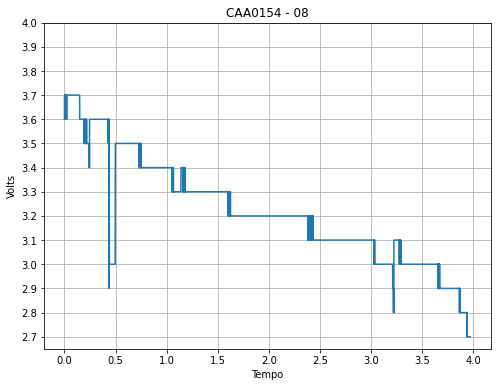

In [ ]:
plt.figure(figsize=((8,6)))
figure = plt.plot(dados['Time'], dados['Voltage(V)'])
plt.xlabel("Tempo")  
plt.grid() 
plt.ylabel("Volts") 
plt.yticks(np.arange(2.7, 4.1, 0.1))
plt.title(titulo)
plt.savefig('resultado.png')
plt.show()


In [ ]:
capacidade = tempo2 / (sum(dados['Current(A)']) / tam) 
capacidade = str(capacidade)
capacidade = capacidade.split(":")
capacidade = round(float(capacidade[2]), 3)

In [ ]:
tempo = str(tempo)
tempo = tempo.split(" ")

In [ ]:
pdf = FPDF()

pdf.add_page()
pdf.set_font("Arial", size = 15)

pdf.cell(200, 10, txt = str(titulo),  
         ln = 1, align = 'C')


pdf.image('resultado.png', x = None, y = None, w = 0)




pdf.cell(200, 10, txt =  '  ',  
         ln = 1, align = 'L')

pdf.cell(200, 10, txt = titulo +':',  
         ln = 1, align = 'L')


pdf.cell(200, 10, txt = 'Início: ' + str(data_teste) + ' ' + str(hora_inicio[1]),  
         ln = 1, align = 'L')

pdf.cell(200, 10, txt = 'Taxa de descarga: 1,00A',  
         ln = 1, align = 'L')

pdf.cell(200, 10, txt = 'Tensão Inicial: ' + str(dados['Voltage(V)'].iloc[0]) + ' V',  
         ln = 1, align = 'L')
pdf.cell(200, 10, txt = 'Tensão Final: ' + str(dados['Voltage(V)'].iloc[-1]) + ' V',  
         ln = 1, align = 'L')

pdf.cell(200, 10, txt = 'Tempo total de teste: ' + tempo[2],  
         ln = 1, align = 'L')

pdf.cell(200, 10, txt = 'Capacidade da bateria: ' + str(capacidade) + ' Ah',  
         ln = 1, align = 'L')

pdf.output(titulo+'.pdf')        

''